### Stock Price Prediction of Bank of America Using Machine Learning and Macroeconomic Indicators

In [53]:
# Building Machine Learning models to predict Bank Of America's next day prices using historical stock data,
# with peer financial stocks (JP Morgan, Morgan Stanley, Citi Group and Wells Fargo)
# as well as key macroeconomic variables like VIX, 10-Year Treasury Yield, Dollar Index, Oil prices and Gold prices

# Perform Feature Engineering

# Applying different ML algorithms such as Decision Tree, Random Forest, Support Vector Machine and K-Nearest Neighbor models

# Evaluating the model based o R-Squared, RMSE, MSE and other metrics

In [54]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [55]:
# BAC -> Bank of America
# JPM -> JP Morgan
# MS -> Morgan Stanley
# C -> Citi Group
# WFC -> Wells Fargo
# ^GSPC -> S&P 500
# ^VIX -> Volatility Index
# ^TNX -> 10-Year Treasury Yield
# DXY -> Dollar Index
# CL=F -> Oil Prices
# GC=F -> Gold Prices

In [56]:
# Download historical stock data for Bank of America and its peers from Yahoo Finance

tickers = ['BAC', 'JPM', 'MS', 'C', 'WFC', '^GSPC', '^VIX', '^TNX', 'DX-Y.NYB', 'CL=F', 'GC=F']
data = yf.download(tickers, start='2002-01-01', end='2025-01-01')['Close']  # Drop rows with any NaN values
data

[*********************100%***********************]  11 of 11 completed


Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,WFC,^GSPC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.843857,276.156647,21.010000,115.790001,278.899994,18.587126,27.954092,11.306941,1154.670044,5.157,22.709999
2002-01-03,17.824013,276.373352,20.370001,116.110001,278.200012,19.083124,28.764038,11.348587,1165.270020,5.120,21.340000
2002-01-04,18.101765,281.516418,21.620001,116.330002,278.899994,19.942179,30.191618,11.377213,1172.510010,5.141,20.450001
2002-01-07,17.886358,278.214050,21.480000,116.330002,278.600006,19.891045,29.963825,11.395442,1164.890015,5.057,21.940001
2002-01-08,17.600113,267.981903,21.250000,116.830002,278.899994,19.737642,29.336096,11.351186,1160.709961,5.057,21.830000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,44.101688,69.952347,70.099998,108.260002,2620.000000,239.589218,125.215454,70.849594,6040.040039,4.591,14.270000
2024-12-26,44.270622,70.297188,69.620003,108.129997,2638.800049,240.409912,126.171379,71.017845,6037.589844,4.579,14.730000
2024-12-27,44.061939,69.952347,70.599998,108.000000,2617.199951,238.462036,124.919815,70.374565,5970.839844,4.619,15.950000


In [57]:
# Data info to check the structure and types of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5810 entries, 2002-01-02 to 2024-12-31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BAC       5789 non-null   float64
 1   C         5789 non-null   float64
 2   CL=F      5779 non-null   float64
 3   DX-Y.NYB  5807 non-null   float64
 4   GC=F      5775 non-null   float64
 5   JPM       5789 non-null   float64
 6   MS        5789 non-null   float64
 7   WFC       5789 non-null   float64
 8   ^GSPC     5789 non-null   float64
 9   ^TNX      5783 non-null   float64
 10  ^VIX      5789 non-null   float64
dtypes: float64(11)
memory usage: 544.7 KB


In [58]:
# Statistics summary of the data to understand the distribution and basic statistics
data.describe()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,WFC,^GSPC,^TNX,^VIX
count,5789.000000,5789.000000,5779.000000,5807.000000,5775.000000,5789.000000,5789.000000,5789.000000,5789.000000,5783.000000,5789.000000
mean,22.095994,110.073951,66.811741,90.834779,1212.050857,60.711951,37.520452,29.555229,2181.143748,3.079020,19.471192
std,10.042737,110.526009,24.071656,10.092432,555.276716,49.422008,23.835383,13.009360,1271.855308,1.158701,8.613284
min,2.470940,7.663628,-37.630001,71.330002,278.100006,8.205746,6.460619,5.385918,676.530029,0.499000,9.140000
25%,12.736437,36.660889,48.520000,81.879997,732.649994,25.016426,21.585953,18.207212,1202.079956,2.130000,13.610000
50%,22.863873,50.757572,66.230003,90.779999,1253.000000,37.881187,29.309078,24.392466,1650.339966,2.979000,17.100000
75%,29.551435,197.121597,84.514999,97.825001,1648.750000,89.981758,42.486706,40.995258,2842.739990,4.099500,22.530001
max,47.207829,383.228271,145.289993,120.239998,2788.500000,247.479630,133.030334,76.550026,6090.270020,5.428000,82.690002


In [59]:
# Check for any missing values in the dataset
data.isnull().sum()  

Ticker
BAC         21
C           21
CL=F        31
DX-Y.NYB     3
GC=F        35
JPM         21
MS          21
WFC         21
^GSPC       21
^TNX        27
^VIX        21
dtype: int64

In [60]:
# Fill missing values with the previous day's value (forward fill)
data.ffill(inplace=True)
data.head()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,WFC,^GSPC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.843857,276.156647,21.010000,115.790001,278.899994,18.587126,27.954092,11.306941,1154.670044,5.157,22.709999
2002-01-03,17.824013,276.373352,20.370001,116.110001,278.200012,19.083124,28.764038,11.348587,1165.270020,5.120,21.340000
2002-01-04,18.101765,281.516418,21.620001,116.330002,278.899994,19.942179,30.191618,11.377213,1172.510010,5.141,20.450001
2002-01-07,17.886358,278.214050,21.480000,116.330002,278.600006,19.891045,29.963825,11.395442,1164.890015,5.057,21.940001
2002-01-08,17.600113,267.981903,21.250000,116.830002,278.899994,19.737642,29.336096,11.351186,1160.709961,5.057,21.830000


In [61]:
data.isnull().sum()  # Check for any missing values in the dataset

Ticker
BAC         0
C           0
CL=F        0
DX-Y.NYB    0
GC=F        0
JPM         0
MS          0
WFC         0
^GSPC       0
^TNX        0
^VIX        0
dtype: int64

In [62]:
# Correlation matrix to understand relationships between different stocks and macroeconomic variables
data.corr()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,WFC,^GSPC,^TNX,^VIX
Ticker,,,,,,,,,,,
BAC,1.000000,0.461779,-0.070637,0.360871,0.071502,0.569557,0.786216,0.342323,0.564305,0.381009,-0.214983
C,0.461779,1.000000,-0.328865,-0.056293,-0.753355,-0.404546,-0.078854,-0.509659,-0.408968,0.716295,-0.165584
CL=F,-0.070637,-0.328865,1.000000,-0.513374,0.436498,0.117551,0.110137,0.149889,0.138528,-0.045080,-0.111997
DX-Y.NYB,0.360871,-0.056293,-0.513374,1.000000,0.165210,0.527508,0.509171,0.449883,0.540908,0.055238,0.003703
GC=F,0.071502,-0.753355,0.436498,0.165210,1.000000,0.787185,0.581200,0.694652,0.799297,-0.526051,-0.022830
JPM,0.569557,-0.404546,0.117551,0.527508,0.787185,1.000000,0.902370,0.834764,0.986031,-0.196493,-0.136455
MS,0.786216,-0.078854,0.110137,0.509171,0.581200,0.902370,1.000000,0.660625,0.906650,0.098139,-0.153446
WFC,0.342323,-0.509659,0.149889,0.449883,0.694652,0.834764,0.660625,1.000000,0.830103,-0.322967,-0.333026
^GSPC,0.564305,-0.408968,0.138528,0.540908,0.799297,0.986031,0.906650,0.830103,1.000000,-0.239969,-0.148408


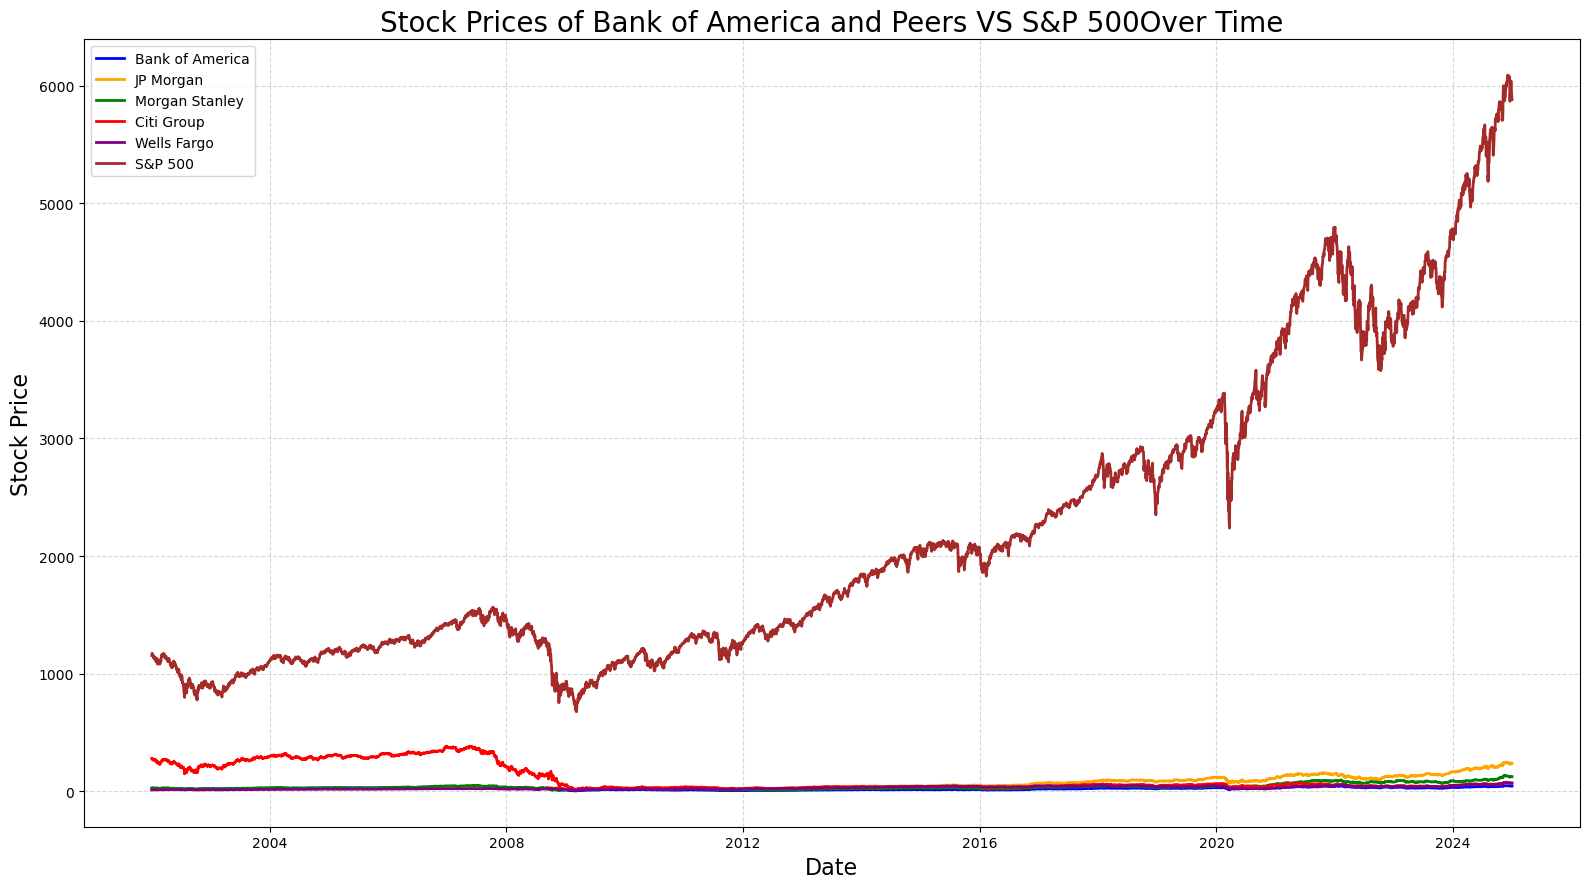

In [63]:
plt.figure(figsize=(16, 9))

# Plotting each stock's closing price over time
plt.plot(data.index, data['BAC'], label='Bank of America', linewidth = 2, color='blue')
plt.plot(data.index, data['JPM'], label='JP Morgan', linewidth = 2, color='orange')
plt.plot(data.index, data['MS'], label='Morgan Stanley', linewidth = 2, color='green')
plt.plot(data.index, data['C'], label='Citi Group', linewidth = 2, color='red')
plt.plot(data.index, data['WFC'], label='Wells Fargo', linewidth = 2, color='purple')
plt.plot(data.index, data['^GSPC'], label='S&P 500', linewidth = 2, color='brown')
plt.title('Stock Prices of Bank of America and Peers VS S&P 500Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Stock Price', fontsize = 16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [64]:
data.head()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,WFC,^GSPC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.843857,276.156647,21.010000,115.790001,278.899994,18.587126,27.954092,11.306941,1154.670044,5.157,22.709999
2002-01-03,17.824013,276.373352,20.370001,116.110001,278.200012,19.083124,28.764038,11.348587,1165.270020,5.120,21.340000
2002-01-04,18.101765,281.516418,21.620001,116.330002,278.899994,19.942179,30.191618,11.377213,1172.510010,5.141,20.450001
2002-01-07,17.886358,278.214050,21.480000,116.330002,278.600006,19.891045,29.963825,11.395442,1164.890015,5.057,21.940001
2002-01-08,17.600113,267.981903,21.250000,116.830002,278.899994,19.737642,29.336096,11.351186,1160.709961,5.057,21.830000


In [65]:
# Feature Engineering

df= pd.DataFrame(index=data.index)

# Creating lagged features for each stock
df['BAC(t-1)'] = data['BAC'].shift(1)
df['C(t-1)'] = data['C'].shift(1)
df['JPM(t-1)'] = data['JPM'].shift(1)
df['MS(t-1)'] = data['MS'].shift(1)
df['WFC(t-1)'] = data['WFC'].shift(1)
df['^GSPC(t-1)'] = data['^GSPC'].shift(1) # The shift(1) considers the previous day's value

# Creating lagged features for macroeconomic variables
df['^VIX(t-1)'] = data['^VIX'].shift(1)
df['^TNX(t-1)'] = data['^TNX'].shift(1)
df['DXY(t-1)'] = data['DX-Y.NYB'].shift(1)
df['CL=F(t-1)'] = data['CL=F'].shift(1)
df['GC=F(t-1)'] = data['GC=F'].shift(1)

# Moving average and rolling volatility features
df['BAC_MA_5'] = data['BAC'].rolling(window=5).mean().shift(1)  # 5-day moving average
df['BAC_MA_10'] = data['BAC'].rolling(window=10).mean().shift(1)  # 10-day moving average
df['BAC_Rolling_Volatility_5'] = data['BAC'].pct_change(5).shift(1)  # 5-day rolling volatility

# Setting variable Y
df['Target'] = data['BAC']
df = df.dropna()

df.head()

,BAC(t-1),C(t-1),JPM(t-1),MS(t-1),WFC(t-1),^GSPC(t-1),^VIX(t-1),^TNX(t-1),DXY(t-1),CL=F(t-1),GC=F(t-1),BAC_MA_5,BAC_MA_10,BAC_Rolling_Volatility_5,Target
Date,,,,,,,,,,,,,,,
2002-01-16,17.415897,269.172974,19.364376,29.402170,11.796286,1146.189941,22.700001,4.831,117.290001,18.900000,284.399994,17.402857,17.627039,-0.010467,17.231670
2002-01-17,17.231670,264.517120,18.668936,28.395826,11.804094,1127.569946,23.450001,4.839,117.589996,18.860001,287.299988,17.337671,17.565820,-0.018564,17.322363
2002-01-18,17.322363,270.147430,18.842793,29.295427,11.871768,1138.880005,22.250000,4.933,117.849998,18.040001,284.399994,17.287789,17.515655,-0.014194,17.231670
2002-01-21,17.231670,270.472290,18.362141,28.777018,11.811900,1127.579956,22.520000,4.888,117.510002,18.000000,283.100006,17.282119,17.428646,-0.001642,17.231670
2002-01-22,17.231670,270.472290,18.362141,28.777018,11.811900,1127.579956,22.520000,4.888,117.660004,18.000000,283.100006,17.286654,17.363177,0.001318,17.761665


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5800 entries, 2002-01-16 to 2024-12-31
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BAC(t-1)                  5800 non-null   float64
 1   C(t-1)                    5800 non-null   float64
 2   JPM(t-1)                  5800 non-null   float64
 3   MS(t-1)                   5800 non-null   float64
 4   WFC(t-1)                  5800 non-null   float64
 5   ^GSPC(t-1)                5800 non-null   float64
 6   ^VIX(t-1)                 5800 non-null   float64
 7   ^TNX(t-1)                 5800 non-null   float64
 8   DXY(t-1)                  5800 non-null   float64
 9   CL=F(t-1)                 5800 non-null   float64
 10  GC=F(t-1)                 5800 non-null   float64
 11  BAC_MA_5                  5800 non-null   float64
 12  BAC_MA_10                 5800 non-null   float64
 13  BAC_Rolling_Volatility_5  5800 non-null   flo

In [67]:
# Train Machine Learning Algorithm

# Defining X and Y variables
X = df.drop(columns=['Target'], axis=1)
Y = df['Target']

In [68]:
# Splitting the dataset into training and testing sets (90:10 split)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle = False)

In [69]:
# Applying different Machine Learning algorithms

# Calling and training all the models

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, Y_train)

from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, Y_train)

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

In [70]:
# Predicting on the test set

dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

In [71]:
# Actual vs Predicted values for each model

results = pd.DataFrame({
    'Actual': Y_test,
    'Decision Tree': dt_predictions,
    'Random Forest': rf_predictions,
    'Support Vector Machine': svr_predictions,
    'K-Nearest Neighbor': knn_predictions
})
results

,Actual,Decision Tree,Random Forest,Support Vector Machine,K-Nearest Neighbor
Date,,,,,
2022-09-12,32.954311,32.645977,32.307962,35.567717,32.272696
2022-09-13,31.767696,32.901829,32.611818,35.884036,31.711983
2022-09-14,31.646229,32.617935,31.842881,34.193416,31.134540
2022-09-15,32.244205,32.375019,31.726511,34.434090,31.119519
2022-09-16,31.879818,32.617935,32.160246,34.280588,30.868968
...,...,...,...,...,...
2024-12-24,44.101688,42.300964,43.459698,34.574519,42.069233
2024-12-26,44.270622,42.300964,43.546277,34.361027,42.069233
2024-12-27,44.061939,44.782253,44.102910,34.259664,42.069233


In [72]:
# Evaluate the Decision Tree model based on R-Squared, RMSE and MSE

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def evaluate_model(model_name, Y_true, Y_predicted):
    r2 = r2_score(Y_true, Y_predicted)
    mse = mean_squared_error(Y_true, Y_predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_true, Y_predicted)
    
    print(f"Model Name: {model_name}")
    print("")
    print(f"R-Squared: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print("--------------------------------------------------")


    
evaluate_model("Decision Tree", Y_test, dt_predictions)
evaluate_model("Random Forest", Y_test, rf_predictions)
evaluate_model("Support Vector Machine", Y_test, svr_predictions)
evaluate_model("K-Nearest Neighbor", Y_test, knn_predictions)

    

Model Name: Decision Tree

R-Squared: 0.9639
Mean Squared Error (MSE): 1.1575
Root Mean Squared Error (RMSE): 1.0759
Mean Absolute Error (MAE): 0.8552
--------------------------------------------------
Model Name: Random Forest

R-Squared: 0.9848
Mean Squared Error (MSE): 0.4881
Root Mean Squared Error (RMSE): 0.6986
Mean Absolute Error (MAE): 0.5096
--------------------------------------------------
Model Name: Support Vector Machine

R-Squared: -0.1612
Mean Squared Error (MSE): 37.2466
Root Mean Squared Error (RMSE): 6.1030
Mean Absolute Error (MAE): 5.0533
--------------------------------------------------
Model Name: K-Nearest Neighbor

R-Squared: -0.5127
Mean Squared Error (MSE): 48.5216
Root Mean Squared Error (RMSE): 6.9657
Mean Absolute Error (MAE): 5.7799
--------------------------------------------------


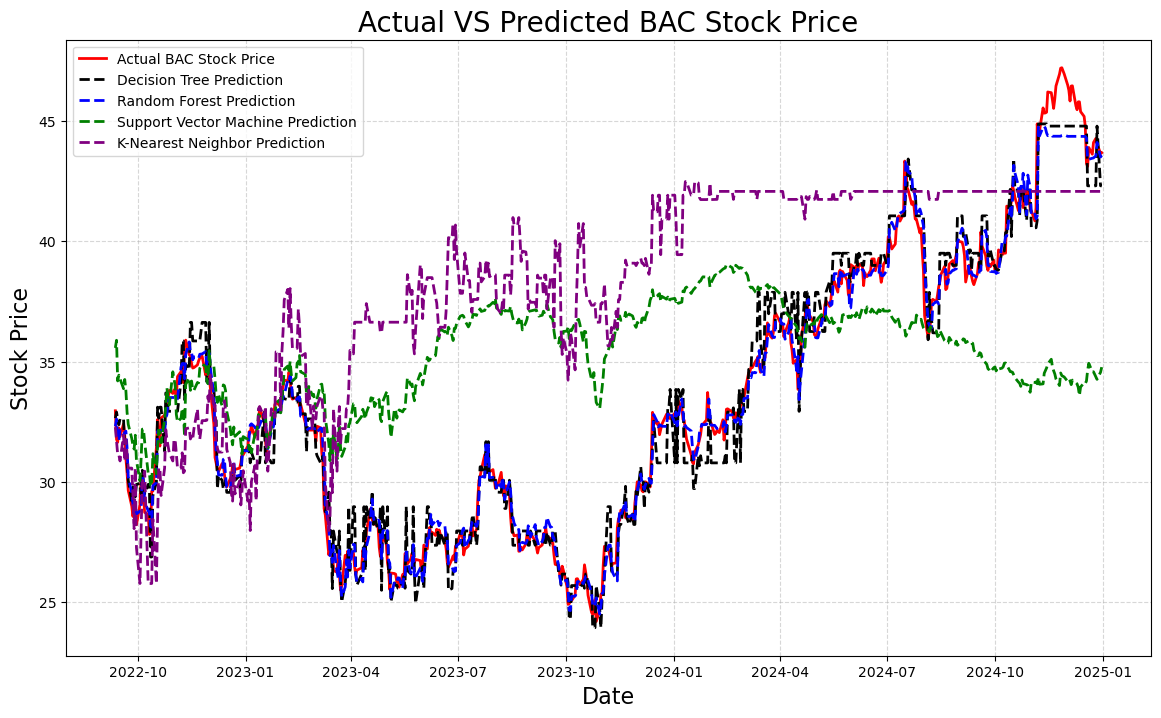

In [73]:
# Visualizing the model predictions

# Plot figure size
plt.figure(figsize=(14, 8))
plt.plot(Y_test.index, Y_test, label='Actual BAC Stock Price', color='red', linewidth=2)
plt.plot(Y_test.index, dt_predictions, label='Decision Tree Prediction', color='black', linestyle='--', linewidth=2)
plt.plot(Y_test.index, rf_predictions, label='Random Forest Prediction', color='blue', linestyle='--', linewidth=2)
plt.plot(Y_test.index, svr_predictions, label='Support Vector Machine Prediction', color='green', linestyle='--', linewidth=2)
plt.plot(Y_test.index, knn_predictions, label='K-Nearest Neighbor Prediction', color='purple', linestyle='--', linewidth=2)
plt.title('Actual VS Predicted BAC Stock Price', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Stock Price', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [76]:
# Takes

# Observing the plots, we can see that the Random Forest model seems to capture the trend of the actual BAC stock price more closely than the other models.

In [74]:
# Most important features in the Decision Tree model

importances = dt_model.feature_importances_
feature_names = X_train.columns

df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_importances = df_importances.sort_values(by='Importance', ascending = False)
df_importances

,Feature,Importance
0,BAC(t-1),0.997646
11,BAC_MA_5,0.000584
2,JPM(t-1),0.000222
6,^VIX(t-1),0.000219
3,MS(t-1),0.000208
12,BAC_MA_10,0.000185
13,BAC_Rolling_Volatility_5,0.000164
8,DXY(t-1),0.000144
10,GC=F(t-1),0.000140
9,CL=F(t-1),0.000129


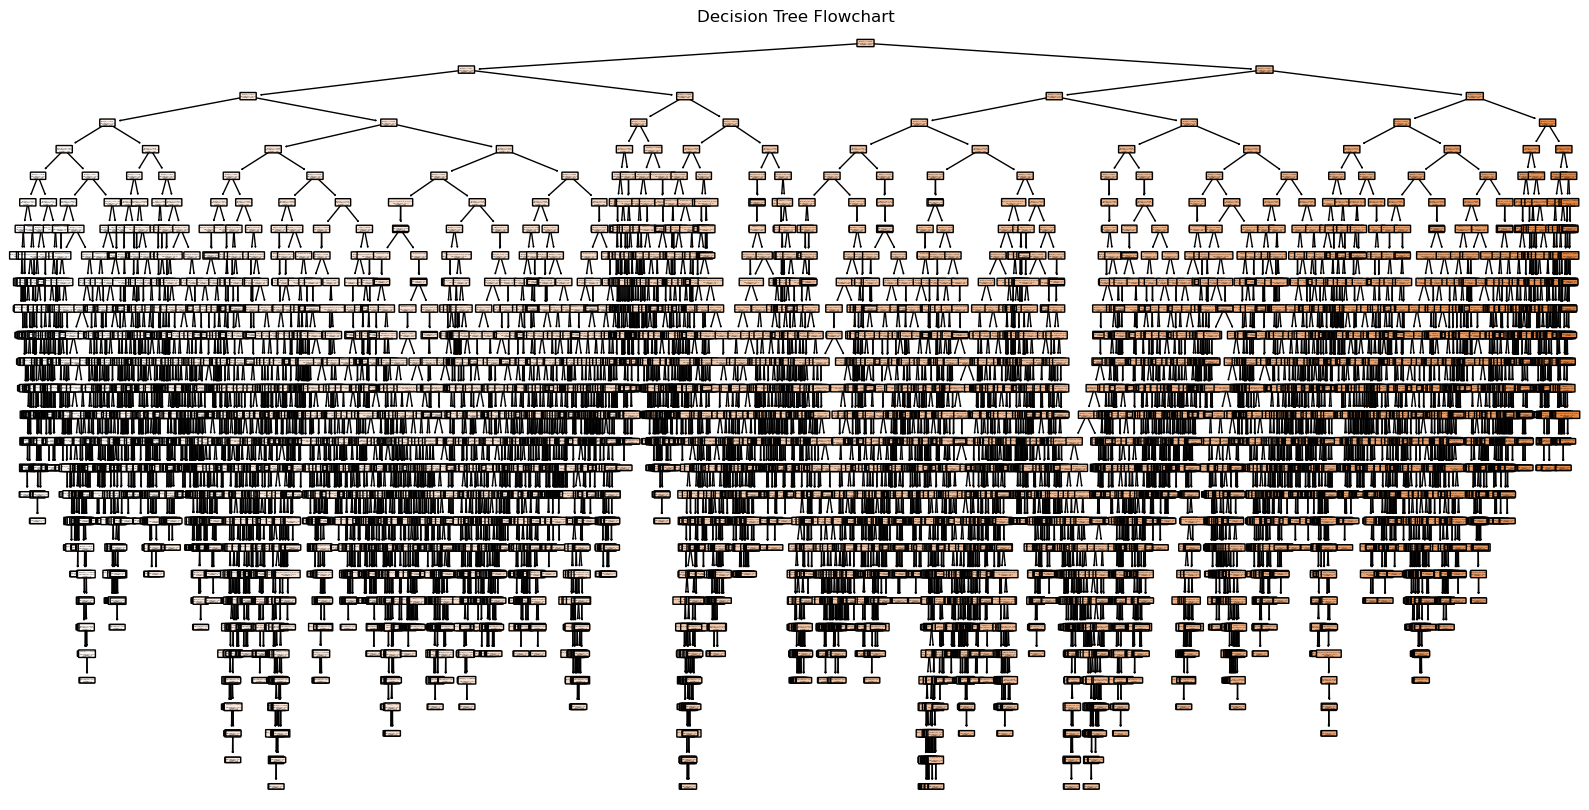

In [75]:
# Decision Tree Flowchart

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names = X.columns, filled = True, rounded = True, precision = 2)
plt.title('Decision Tree Flowchart')
plt.show()